In [1]:
#Импотируем необходимые бибилиотеки
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [2]:
wine = load_wine()

In [3]:
type(wine)

sklearn.utils._bunch.Bunch

In [4]:
data = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                   columns= wine['feature_names']+['target'])

In [5]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [6]:
data.shape

(178, 14)

In [7]:
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [8]:
data.isna()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#Обработка пропусков
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

df = pd.read_csv('penguins_size.csv', sep=",")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [13]:
df.shape

(344, 7)

In [14]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [15]:
#Обработка пропусков
df.isna()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [17]:
#Выберем числовые колонки с пропущенными значениями
#Цикл по колонкам датасета
num_cols =[]
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка culmen_length_mm. Тип данных float64. Количество пустых значений 2.
Колонка culmen_depth_mm. Тип данных float64. Количество пустых значений 2.
Колонка flipper_length_mm. Тип данных float64. Количество пустых значений 2.
Колонка body_mass_g. Тип данных float64. Количество пустых значений 2.


In [18]:
#Фильтр по колонкам с пропущенными значениями
df_num = df[num_cols]
df_num

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [19]:
#Выберем категориальные колонки с пропущенными значениями
cat_cols = []
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка sex. Тип данных object. Количество пустых значений 10.


In [20]:
# Удалим строки, которые содержат пустые значения
df_new = df.dropna(axis=0, how='any')
(df.shape, df_new.shape)

df_new.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [21]:
#Преобразование категориальных признаков в числовые
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
cat_temp_df = df[['sex']]
cat_temp_df.head()

imp2 = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
df_imp2 = imp2.fit_transform(cat_temp_df)
df_imp2

cat_enc = pd.DataFrame({'c1':df_imp2.T[0]})
cat_enc

,c1
0,MALE
1,FEMALE
2,FEMALE
3,MALE
4,FEMALE
...,...
339,MALE
340,FEMALE
341,MALE
342,FEMALE


In [22]:
#Кодирование категорий наборами бинарных значений
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(344, 1)

In [23]:
cat_enc_ohe.shape

(344, 3)

In [24]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

In [25]:
cat_enc.head(10)

,c1
0,MALE
1,FEMALE
2,FEMALE
3,MALE
4,FEMALE
5,MALE
6,FEMALE
7,MALE
8,MALE
9,MALE


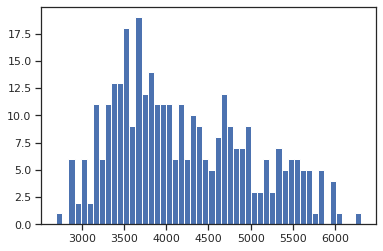

In [26]:
#Масштабирование данных
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['body_mass_g']])

plt.hist(df['body_mass_g'], 50)
plt.show()

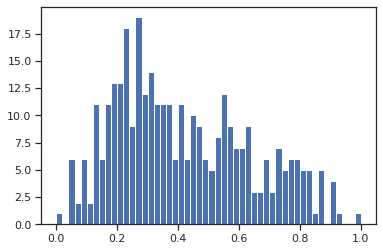

In [27]:
plt.hist(sc1_data, 50)
plt.show()